#Getting Data

In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aaassdfsdfef","key":"fb05b989359f0007deeb7a7b60aafcbc"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

 87% 37.0M/42.7M [00:00<00:00, 49.1MB/s]
100% 42.7M/42.7M [00:00<00:00, 96.6MB/s]


In [ ]:
!unzip brazilian-ecommerce.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


#EDA

In [ ]:
import pandas as pd 
df = pd.read_csv("olist_order_reviews_dataset.csv")

In [ ]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


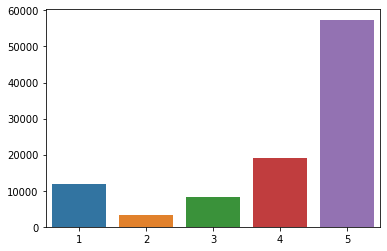

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(df["review_score"].value_counts().index,df["review_score"].value_counts().values)
plt.show()

In [ ]:
df["review_score"].isnull().sum()

0

In [ ]:
print("% of null values of review_comment_message :",df['review_comment_message'].isnull().sum() / len(df['review_comment_message']))
print("% of null values of review_comment_title :",df['review_comment_title'].isnull().sum() / len(df['review_comment_title']))

% of null values of review_comment_message : 0.58247
% of null values of review_comment_title : 0.88285


In [ ]:
title_only_percentage = len(df[df["review_comment_message"].isnull()][df["review_comment_title"].isnull()==False]) / len(df)
message_only_percentage = len(df[df["review_comment_title"].isnull()][df["review_comment_message"].isnull()==False]) / len(df)
title_and_message_percentage = len(df[df["review_comment_title"].isnull()==False][df["review_comment_message"].isnull()==False]) / len(df)

print("% of title_only reviews:",title_only_percentage)
print("% of message_only reviews",message_only_percentage)
print("% of title and message reviews",title_and_message_percentage)

% of title_only reviews: 0.01729
% of message_only reviews 0.31767
% of title and message reviews 0.09986


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


#Append title with message

In [ ]:
import numpy as np
df["review_comment"] = np.where(df["review_comment_title"].isnull()==False,df["review_comment_title"] +" "+ df["review_comment_message"],
                                df["review_comment_message"]) 

df["review_comment"] = np.where(df["review_comment_message"].isnull(),
                                df["review_comment_title"], df["review_comment"] )

In [ ]:
df = df[["review_comment_title","review_comment_message","review_comment","review_score"]]

In [ ]:
df

,review_comment_title,review_comment_message,review_comment,review_score
0,NaN,NaN,NaN,4
1,NaN,NaN,NaN,5
2,NaN,NaN,NaN,5
3,NaN,Recebi bem antes do prazo estipulado.,Recebi bem antes do prazo estipulado.,5
4,NaN,Parabéns lojas lannister adorei comprar pela I...,Parabéns lojas lannister adorei comprar pela I...,5
...,...,...,...,...
99995,NaN,NaN,NaN,5
99996,NaN,"Excelente mochila, entrega super rápida. Super...","Excelente mochila, entrega super rápida. Super...",5
99997,NaN,NaN,NaN,4
99998,NaN,Solicitei a compra de uma capa de retrovisor c...,Solicitei a compra de uma capa de retrovisor c...,1


In [ ]:
df[df["review_comment_message"].isnull()][df["review_comment_title"].isnull()==False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,review_comment_title,review_comment_message,review_comment,review_score
53,Ótimo,NaN,Ótimo,5
104,Não recebi o produto.,NaN,Não recebi o produto.,3
220,Entrega antes do previsto,NaN,Entrega antes do previsto,5
225,Recomendo,NaN,Recomendo,5
497,Ótimo,NaN,Ótimo,5
...,...,...,...,...
99798,Excelente,NaN,Excelente,5
99835,Super satisfeito,NaN,Super satisfeito,5
99857,muito bom,NaN,muito bom,5
99951,super recomendo,NaN,super recomendo,5


In [ ]:
df[df["review_comment"].isnull()][df["review_comment_message"].isnull()==False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,review_comment_title,review_comment_message,review_comment,review_score


In [ ]:
len(df[df["review_comment"].isnull()==False])

43482

In [ ]:
df = df[df["review_comment"].isnull()==False][["review_comment","review_score"]]
df.isnull().sum()

review_comment    0
review_score      0
dtype: int64

In [ ]:
df.head()

,review_comment,review_score
3,Recebi bem antes do prazo estipulado.,5
4,Parabéns lojas lannister adorei comprar pela I...,5
9,recomendo aparelho eficiente. no site a marca ...,4
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4
15,"Super recomendo Vendedor confiável, produto ok...",5


In [ ]:
df.columns = ["text","label"]
df.head()

,text,label
3,Recebi bem antes do prazo estipulado.,5
4,Parabéns lojas lannister adorei comprar pela I...,5
9,recomendo aparelho eficiente. no site a marca ...,4
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4
15,"Super recomendo Vendedor confiável, produto ok...",5


In [ ]:
df['label'] = df["label"].map({1:"negative",2:'negative',3:'neutral',4:'positive',5:'positive'})
df['positive'] = np.where(df['label']=="positive",1,0)
df['neutral'] = np.where(df['label']=="neutral",1,0)
df['negative'] = np.where(df['label']=="negative",1,0)

df

,text,label,positive,neutral,negative
3,Recebi bem antes do prazo estipulado.,positive,1,0,0
4,Parabéns lojas lannister adorei comprar pela I...,positive,1,0,0
9,recomendo aparelho eficiente. no site a marca ...,positive,1,0,0
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",positive,1,0,0
15,"Super recomendo Vendedor confiável, produto ok...",positive,1,0,0
...,...,...,...,...,...
99983,Entregou dentro do prazo. O produto chegou em ...,positive,1,0,0
99990,"O produto não foi enviado com NF, não existe v...",neutral,0,1,0
99996,"Excelente mochila, entrega super rápida. Super...",positive,1,0,0
99998,Solicitei a compra de uma capa de retrovisor c...,negative,0,0,1


In [ ]:
df.drop(['label'],axis=1,inplace=True)

df.head()

,text,positive,neutral,negative
3,Recebi bem antes do prazo estipulado.,1,0,0
4,Parabéns lojas lannister adorei comprar pela I...,1,0,0
9,recomendo aparelho eficiente. no site a marca ...,1,0,0
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1,0,0
15,"Super recomendo Vendedor confiável, produto ok...",1,0,0


get processed data to csv

In [ ]:
df.isnull().sum()

text        0
positive    0
neutral     0
negative    0
dtype: int64

In [ ]:
df.to_csv("cleaned_reviews.csv",index=False)

fixing a csv conversion bug

In [ ]:
df_test = pd.read_csv("cleaned_reviews.csv")
df_test.isnull().sum()

text        2
positive    2
neutral     2
negative    2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43482 entries, 3 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      43482 non-null  object
 1   positive  43482 non-null  int64 
 2   neutral   43482 non-null  int64 
 3   negative  43482 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
len(df)

43482

In [ ]:
len(df_test)

43484

In [ ]:
df_test[df_test["text"].isnull()]

,text,positive,neutral,negative
12293,NaN,0.0,0.0,1.0
25065,NaN,1.0,0.0,0.0


In [ ]:
df_test[df_test["positive"].isnull()]

,text,positive,neutral,negative
12292,Estou aguardando a resposta de quando vão entr...,NaN,NaN,NaN
25064,A única coisa é a fatura ser pago somente no B...,NaN,NaN,NaN


In [ ]:
print(df_test.loc[12292]["text"])
print()
print(df_test.loc[25064]['text'])

Estou aguardando a resposta de quando vão entregar meu massageador que não chegou até agora é ninguém me responde e não tenho um número que eu possa falar com atendente só atendimento eletrônico pfv

A única coisa é a fatura ser pago somente no Banco do Brasil ou preferencial neste Banco . E quando não é cliente é um banco de muitos movimento para ter que enfrentar a fila para se pagar em caixa. 


In [ ]:
df_test.loc[12293,"text"] = 'Estou aguardando a resposta de quando vão entregar meu massageador que não chegou até agora é ninguém me responde e não tenho um número que eu possa falar com atendente só atendimento eletrônico pfv'
df_test.loc[25065,"text"] = 'A única coisa é a fatura ser pago somente no Banco do Brasil ou preferencial neste Banco . E quando não é cliente é um banco de muitos movimento para ter que enfrentar a fila para se pagar em caixa'

df_test.drop(index=[12292,25064],inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43482 entries, 0 to 43483
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   text      43482 non-null  object 
 1   positive  43482 non-null  float64
 2   neutral   43482 non-null  float64
 3   negative  43482 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.7+ MB


In [ ]:
df_test["positive"] = df_test["positive"].astype(int)
df_test["neutral"] = df_test["neutral"].astype(int)
df_test["negative"] = df_test["negative"].astype(int)

In [ ]:
df_test.isnull().sum()

text        0
positive    0
neutral     0
negative    0
dtype: int64

In [ ]:
import string
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation," ")
  return text

df_test["text"] = df_test["text"].apply(remove_punctuation)

In [ ]:
df_test.to_csv("cleaned_reviews.csv",index=False)

#Pytorch

##Preprocessing

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("cleaned_reviews.csv")
df.head()

,text,positive,neutral,negative
0,Recebi bem antes do prazo estipulado,1.0,0.0,0.0
1,Parabéns lojas lannister adorei comprar pela I...,1.0,0.0,0.0
2,recomendo aparelho eficiente no site a marca ...,1.0,0.0,0.0
3,Mas um pouco travando pelo valor ta Boa \r\n,1.0,0.0,0.0
4,Super recomendo Vendedor confiável produto ok...,1.0,0.0,0.0


###workaround a pandas to_csv bug

In [ ]:
df.isnull().sum()

text        1
positive    1
neutral     1
negative    1
dtype: int64

In [ ]:
df[df["text"].isnull()]

,text,positive,neutral,negative
11100,NaN,1.0,0.0,0.0


In [ ]:
df[df["positive"].isnull()]

,text,positive,neutral,negative
11099,Fiquei com receio de fazer essa comora pela In...,NaN,NaN,NaN


In [ ]:
df.loc[11099]["text"]

'Fiquei com receio de fazer essa comora pela Internet mas fiz e vi que valeu a pena Produto entregue mais cedo que o previsto e com todo informação durante seu transporte Parabéns targaryen e lannister '

In [ ]:
df["text"].loc[11100] = 'Fiquei com receio de fazer essa compra pela Internet mas fiz e vi que valeu a pena Produto entregue mais cedo que o previsto e com todo informação durante seu transporte Parabéns targaryen e lannister'

df.drop(index=[11099],inplace=True)

df_test["positive"] = df_test["positive"].astype(int)
df_test["neutral"] = df_test["neutral"].astype(int)
df_test["negative"] = df_test["negative"].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df.isnull().sum()

text        0
positive    0
neutral     0
negative    0
dtype: int64

###processing


* tokenize 
* uniencode
* word to idx



In [ ]:
pip install unidecode

     |████████████████████████████████| 241 kB 8.3 MB/s 


In [ ]:
import unidecode
data ={"text":[],"label":[]}
for i in range(len(df)):
  text = df["text"].iloc[i].lower()
  text = unidecode.unidecode(text)
  text = text.split()

  label = []
  label.append(df['positive'].iloc[i])
  label.append(df['neutral'].iloc[i])
  label.append(df['negative'].iloc[i])

  # works fine
  # label = df['negative'].iloc[i]

  # RAM EXPLODES
  # label = df[['negative']].iloc[i]

  data["text"].append(text)
  data["label"].append(label)

In [ ]:
train_set = {"text":data["text"][0:int(len(data["text"])*0.8)],"label":data["label"][0:int(len(data["label"])*0.8)]}
test_set = {"text":data["text"][int(len(data["text"])*0.8):],"label":data["label"][int(len(data["label"])*0.8):]}

In [ ]:
import numpy as np
random_int = np.random.randint(0,len(train_set['text']))

print(train_set['text'][random_int],train_set['label'][random_int])

['o', 'produto', 'nao', 'e', 'entregue', 'no', 'prazo'] [0.0, 0.0, 1.0]


In [ ]:
wordtoidx = {"<PAD>":0,"<Unknown Word>":1}
idx = 2 # 0 is for padding words and 1 is for unknown

for i in range(len(train_set["text"])):
  tokens = train_set["text"][i]
  for token in tokens:
    if token not in wordtoidx:
      wordtoidx[token] = idx
      idx += 1

In [ ]:
wordtoidx

In [ ]:
a_file = open("wordtoidx.pkl", "wb")
pickle.dump(wordtoidx, a_file)
a_file.close()

a_file = open("wordtoidx.pkl", "rb")
output = pickle.load(a_file)
print(output)

In [ ]:
len(wordtoidx)

14382

In [ ]:
def words_to_int(data):
  for i in range(len(data["text"])):
    for j in range(len(data['text'][i])):
      if data["text"][i][j] in wordtoidx:
        data["text"][i][j] = wordtoidx[data["text"][i][j]]
      else:
        data["text"][i][j] = 1

words_to_int(train_set)
words_to_int(test_set)

In [ ]:
print(train_set["text"][0],test_set["text"][0])

[2, 3, 4, 5, 6, 7] [295, 162, 715, 2776, 182, 1425, 513, 1426, 16, 3387, 144, 90, 2045, 917, 1426, 816, 68, 1550, 42, 858, 6]


In [ ]:
train_set["text"]

[[2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 8, 18, 19, 20, 21],
 [22,
  23,
  24,
  25,
  26,
  18,
  27,
  5,
  23,
  28,
  29,
  30,
  31,
  16,
  32,
  33,
  28,
  34,
  35,
  36,
  37,
  34,
  18,
  27,
  38,
  39,
  40,
  41,
  16,
  42,
  43,
  23],
 [44, 45, 46, 47, 48, 49, 50, 51],
 [52, 22, 53, 54, 55, 56, 16, 57, 4, 5, 6],
 [58, 59, 60, 42, 41, 61, 62, 2, 16, 63, 64, 65, 66, 67],
 [68, 69, 70, 55, 71],
 [72, 73, 74, 75],
 [76, 13, 77, 78, 79],
 [18,
  64,
  80,
  81,
  82,
  18,
  57,
  80,
  83,
  84,
  4,
  5,
  6,
  85,
  42,
  55,
  86,
  87,
  18,
  88,
  89,
  16,
  90,
  42,
  91,
  92,
  93],
 [94, 84, 95, 16, 96],
 [68, 97, 98, 99, 100, 101],
 [62,
  102,
  13,
  14,
  16,
  18,
  57,
  103,
  4,
  5,
  6,
  104,
  41,
  105,
  88,
  42,
  6,
  106,
  25,
  107,
  42,
  6,
  106,
  86,
  108,
  109,
  16,
  110,
  68,
  2,
  42,
  55],
 [84,
  111,
  2,
  112,
  42,
  41,
  113,
  114,
  115,
  116,
  59,
  117,
  118,
  119,
  44,
  28,
  69,
  25,


In [ ]:
max_len = np.max([len(x) for x in train_set["text"]])
max_len

47

In [ ]:
import numpy as np
from sklearn.utils import shuffle
def batches_generator(X,Y,batch_size=32):
  X,Y = shuffle(X,Y)
  num_batches = int (np.ceil(len(X) / batch_size))
  
  for i in range(num_batches):
    x_batch = X[batch_size*i:batch_size*(i+1)]
    y_batch = Y[batch_size*i:batch_size*(i+1)]

    max_len = np.max([len(x) for x in x_batch])
    for j in range(len(x_batch)):
      x = x_batch[j]
      pad = [0] * (max_len - len(x))
      x_batch[j] = pad + x

    x_batch = torch.from_numpy(np.array(x_batch)).long()
    y_batch = torch.from_numpy(np.array(y_batch)).long()

    yield x_batch,y_batch

In [ ]:
train_set['text'][34783:3478599]

[[55, 187, 4, 5, 6, 84, 3, 634, 16, 14380, 72], [14381]]

In [ ]:
device = "cuda:0"

In [ ]:
for inputs,targets in batches_generator(train_set["text"],train_set["label"]):
  print(inputs,inputs.shape,targets,targets.shape)
  break

tensor([[    0,     0,     0,     0,     0,     0,   831,    48,   204,   753,
          3352,  3353,    16,  3867,    59,  3868,    16,     2,   266,    42,
          3867,    59,  3868,   363,    50,  1121],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,    72,     2,    25,
             6,    42,    55,   268,   640,   622],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             6,    59,    57,    72,    52,    22],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            55,    84,    95,    16,    59,   164],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
  

##Modelling

In [ ]:
class RNN(nn.Module):
  def __init__(self,n_vocab,embed_dim,hidden_size,lstm_dropout,output_size):
    super().__init__()

    self.V = n_vocab
    self.D = embed_dim
    self.M = hidden_size
    self.K = output_size

    self.embed = nn.Embedding(self.V,self.D)

    self.rnn = nn.LSTM(
        input_size = self.D,
        hidden_size=self.M,
        num_layers =1,
        batch_first=True,
        dropout=lstm_dropout
    )

    self.fc = nn.Linear(self.M,self.K)

  def forward(self,X):
    h0 = torch.zeros(1,X.size(0),self.M).to(device)
    c0 = torch.zeros(1,X.size(0),self.M).to(device)

    out = self.embed(X)
    out,_ = self.rnn(out,(h0,c0))
    out,_ = torch.max(out,1)
    out = self.fc(out)
    return out 

In [ ]:
len(wordtoidx)

14382

In [ ]:
model = RNN(len(wordtoidx),20,20,0.2,3)
model.to(device)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


RNN(
  (embed): Embedding(14382, 20)
  (rnn): LSTM(20, 20, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=20, out_features=3, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
train_iter = lambda: batches_generator(train_set["text"],train_set["label"])
test_iter = lambda: batches_generator(test_set["text"],test_set["label"])

In [ ]:
train_losses = [];test_losses = []

epochs = 5
for i in range(epochs):
  train_loss = []
  for inputs,targets in train_iter():
    inputs,targets = inputs.to(device),targets.to(device)
    
    #in pytorch targets cant be one-hot-encoded
    targets = targets.argmax(dim=1)

    optimizer.zero_grad()

    output = model(inputs)

    loss = criterion(output,targets)
    train_loss.append(loss.item())

    loss.backward()
    optimizer.step()

  train_loss = np.mean(train_loss)
  train_losses.append(train_loss)

  test_loss = []
  for inputs,targets in test_iter():
    inputs,targets = inputs.to(device),targets.to(device)
  
    #in pytorch targets cant be one-hot-encoded
    targets = targets.argmax(dim=1)

    output_val = model(inputs)
    loss_val = criterion(output_val,targets)
    test_loss.append(loss_val.item())

  test_loss = np.mean(test_loss)
  test_losses.append(test_loss)

  print(f"loss: {train_loss}  val_loss: {test_loss}")

loss: 0.5951246383243843  val_loss: 0.48505124241551933
loss: 0.4560681911021033  val_loss: 0.4471026675446945
loss: 0.41943483162150885  val_loss: 0.4288308665375499
loss: 0.3959481559063801  val_loss: 0.42232179411632176
loss: 0.37779650540666326  val_loss: 0.417488497818875


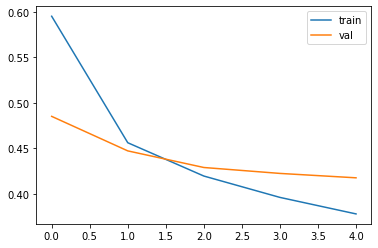

In [ ]:
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="val")
plt.legend()
plt.show()

In [ ]:
def get_accuracy(model,iter):
  total = 0
  correct = 0
  for inputs,targets in iter():
    inputs,targets = inputs.to(device),targets.to(device)

    output = model(inputs)
    output = output.argmax(dim=1)

    targets = targets.argmax(dim=1)

    # update counts
    correct += (output == targets).sum().item()
    total += targets.shape[0]
  
  return correct/total

print("train_acc: ",get_accuracy(model,train_iter),"test_acc: ",get_accuracy(model,test_iter))

train_acc:  0.8733074601121172 test_acc:  0.8519029550419684


save model

In [ ]:
!pwd

/content


In [ ]:
torch.save(model.state_dict(),'./model_weights')

#Later to restore:
model.load_state_dict(torch.load(filepath))
model.eval()